In [1]:
import pyfiles.HFSAnalyzer as HFSA
import pyfiles.groupplot as gp
import matplotlib.pyplot as plt
from imp import reload
import seaborn as sns
import pandas as pd
import numpy as np
import math
import time
import matplotlib.gridspec as gridspec

sns.set_context('talk')
sns.set(font_scale=1.5)
sns.set_style('white')
sns.set_palette('colorblind')
%matplotlib inline

In [2]:
# load and scrub data
workdir = '/home/evan/git/HF-Stability/analysis/'


df = HFSA.directory_to_df(workdir + 'log')
df.to_pickle(workdir + "HFSDataFrame.pickle")
#df = pd.read_pickle(workdir + "HFSDataFrame.pickle")
#df = HFSA.add_Dir_to_pickle_df(workdir + "HFSDataFrame.pickle", workdir + 'log')

df.dropna(axis='rows', subset=['ndim', 'rs', 'Nk', 'mycase', 'Dav_final_val'], inplace=True)
df['Nk'] = df['Nk'].astype(int)
df['ndim'] = df['ndim'].astype(int)

In [3]:
# Split into groups
def dict_subview(dic, keys):
    return {key : val for key, val in data.items() if key in keys}

data = {
     'all'   : df
    ,'3D'    : df[df['ndim'] == 3]
    ,'2D'    : df[df['ndim'] == 2]
    ,'3Drs12': df[np.isclose(df['rs'].as_matrix(), 1.2) & (df['ndim'] == 3)]
    ,'2Drs12': df[np.isclose(df['rs'].as_matrix(), 1.2) & (df['ndim'] == 2)]
    ,'3DR2U' : df[((df.mycase.str.contains('cRHF2cUHF')) & (df['ndim'] == 3))]
    ,'3DR2G' : df[((df.mycase.str.contains('cRHF2cGHF')) & (df['ndim'] == 3))]
    ,'3DU2U' : df[((df.mycase.str.contains('cUHF2cUHF')) & (df['ndim'] == 3))]

    ,'2DR2U' : df[((df.mycase.str.contains('cRHF2cUHF')) & (df['ndim'] == 2))]
    ,'2DR2G' : df[((df.mycase.str.contains('cRHF2cGHF')) & (df['ndim'] == 2))]
    ,'2DU2U' : df[((df.mycase.str.contains('cUHF2cUHF')) & (df['ndim'] == 2))]
}

# remove emptys
data = {key: val for (key, val) in data.items() if len(val) > 0}

In [4]:
# Matplotlib defaults
plt.rcParams['savefig.transparent'] = True
plt.rcParams['savefig.format'] = 'eps'

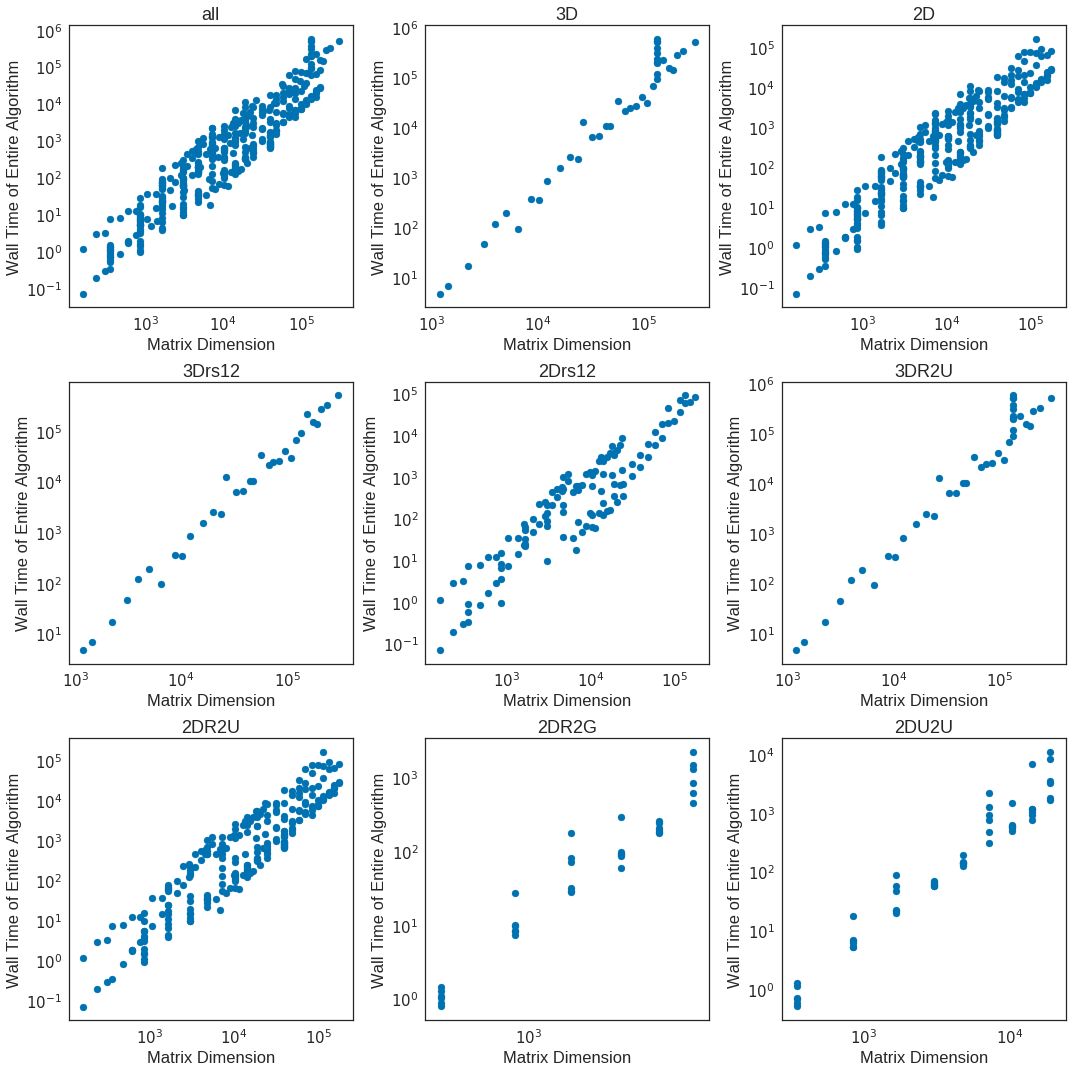

In [5]:
fig = plt.figure(figsize=(15, 15))
HFSA.subplotByDfDict(data, fig, HFSA.plot_runtime)
plt.tight_layout()
plt.show()

/home/evan/git/HF-Stability/analysis/pyfiles/HFSAnalyzer.py:527: RuntimeWarning: divide by zero encountered in log10
  c = np.polyfit(np.log10(Nmatfull)[-10:], np.log10(fulltimes)[-10:], 1)


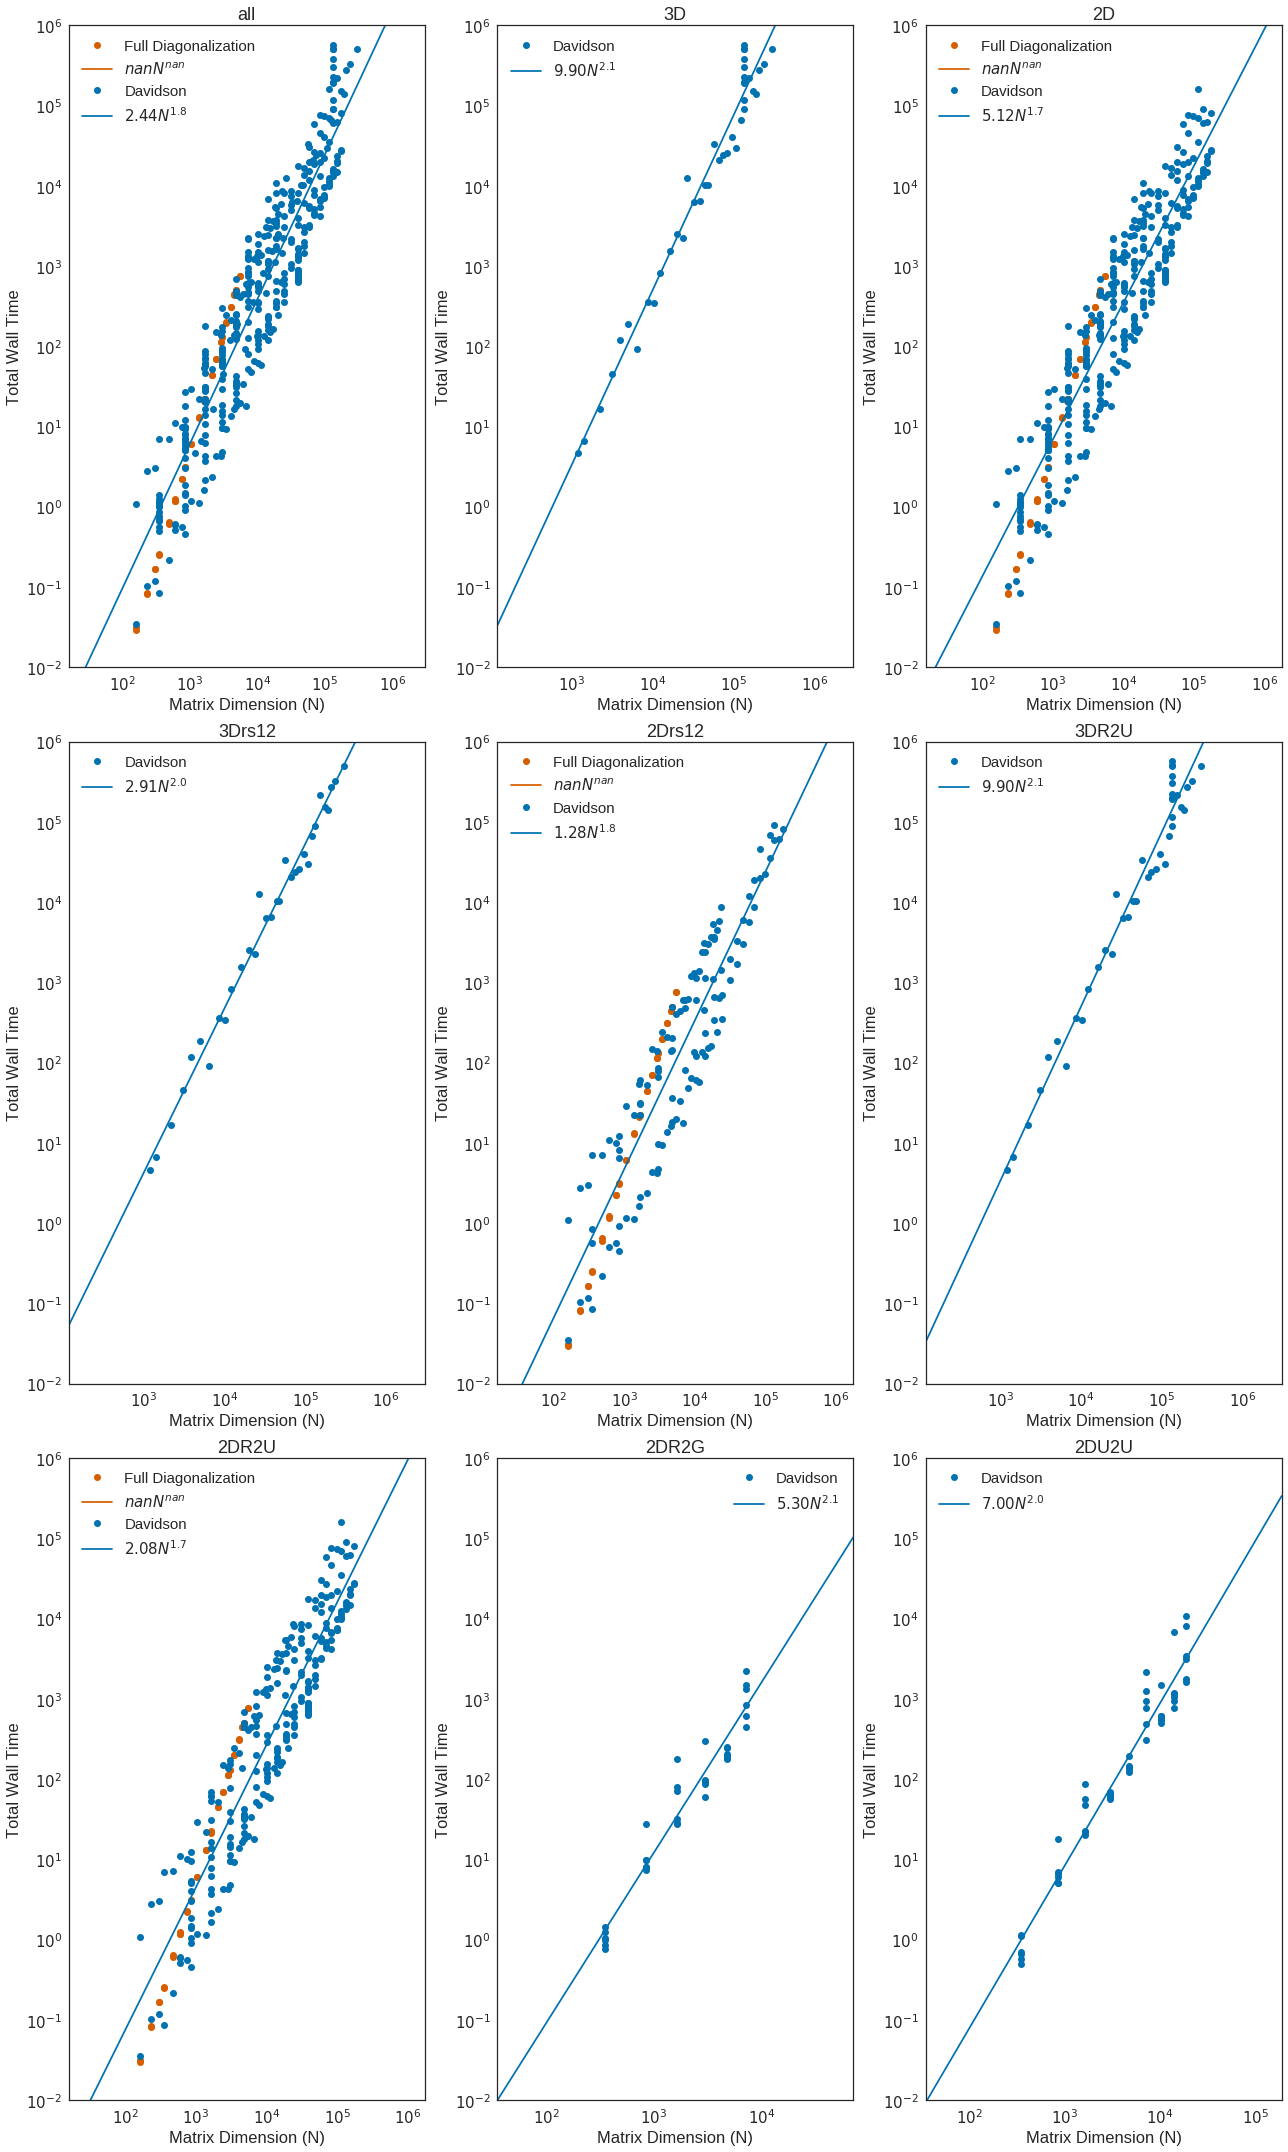

In [6]:
fig = plt.figure(figsize=(18, 30))
HFSA.subplotByDfDict(data, fig, HFSA.plot_diag_scaling)
plt.tight_layout()
plt.show()

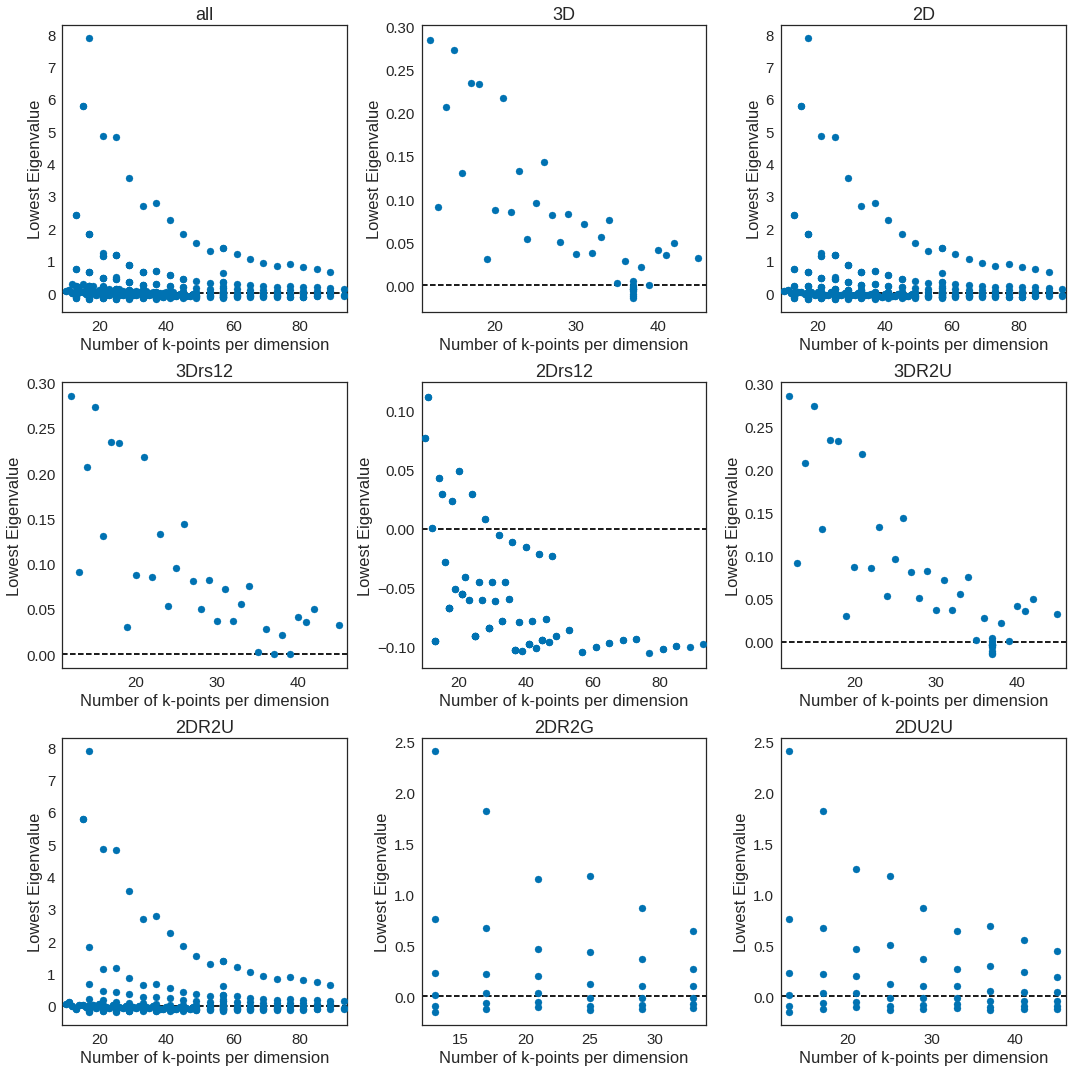

In [7]:
fig = plt.figure(figsize=(15, 15))
HFSA.subplotByDfDict(data, fig, HFSA.plot_dav_vs_full)
plt.tight_layout()
plt.show()

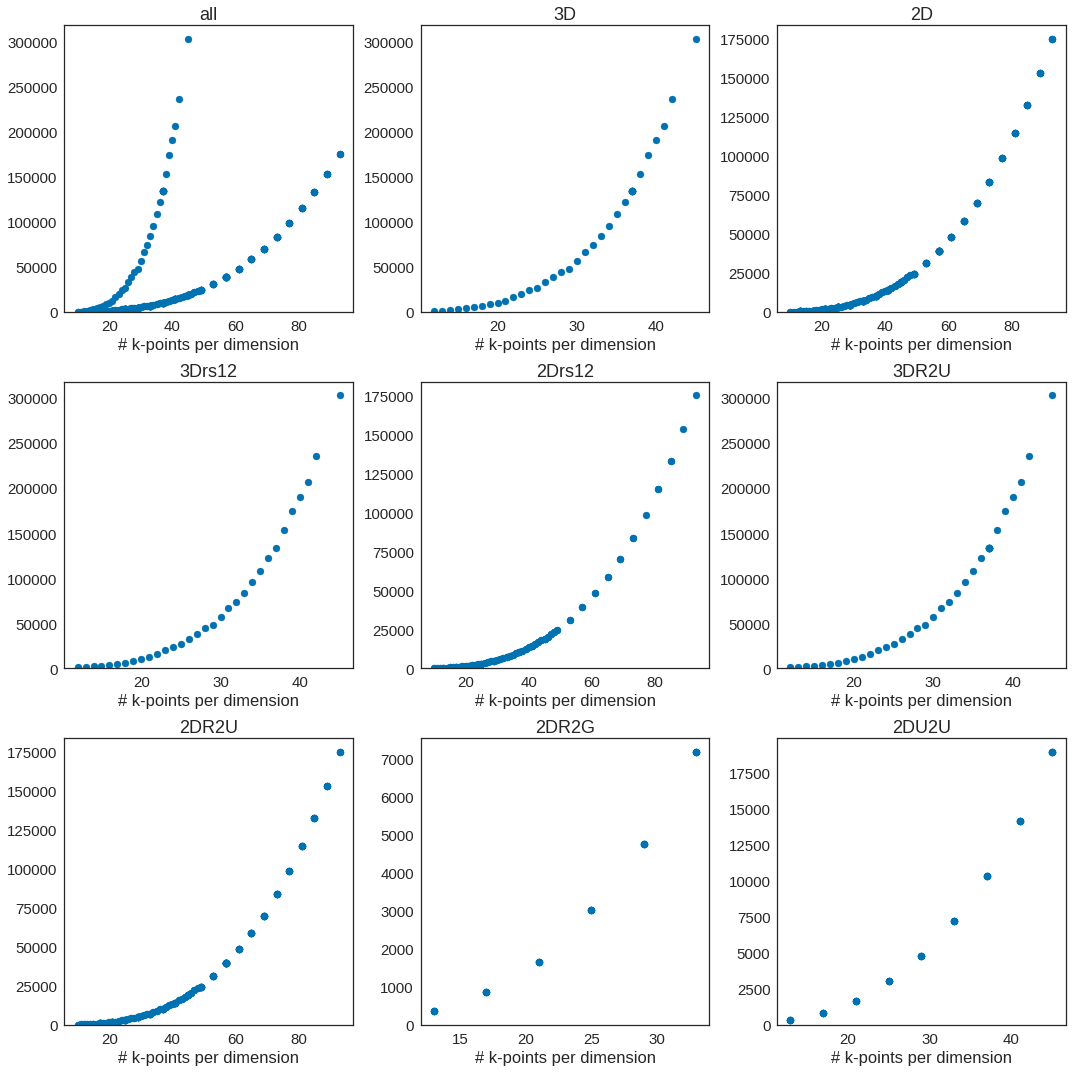

In [8]:
fig = plt.figure(figsize=(15,15))
HFSA.subplotByDfDict(data, fig, HFSA.plot_matrix_scaling)
plt.tight_layout()
plt.show()

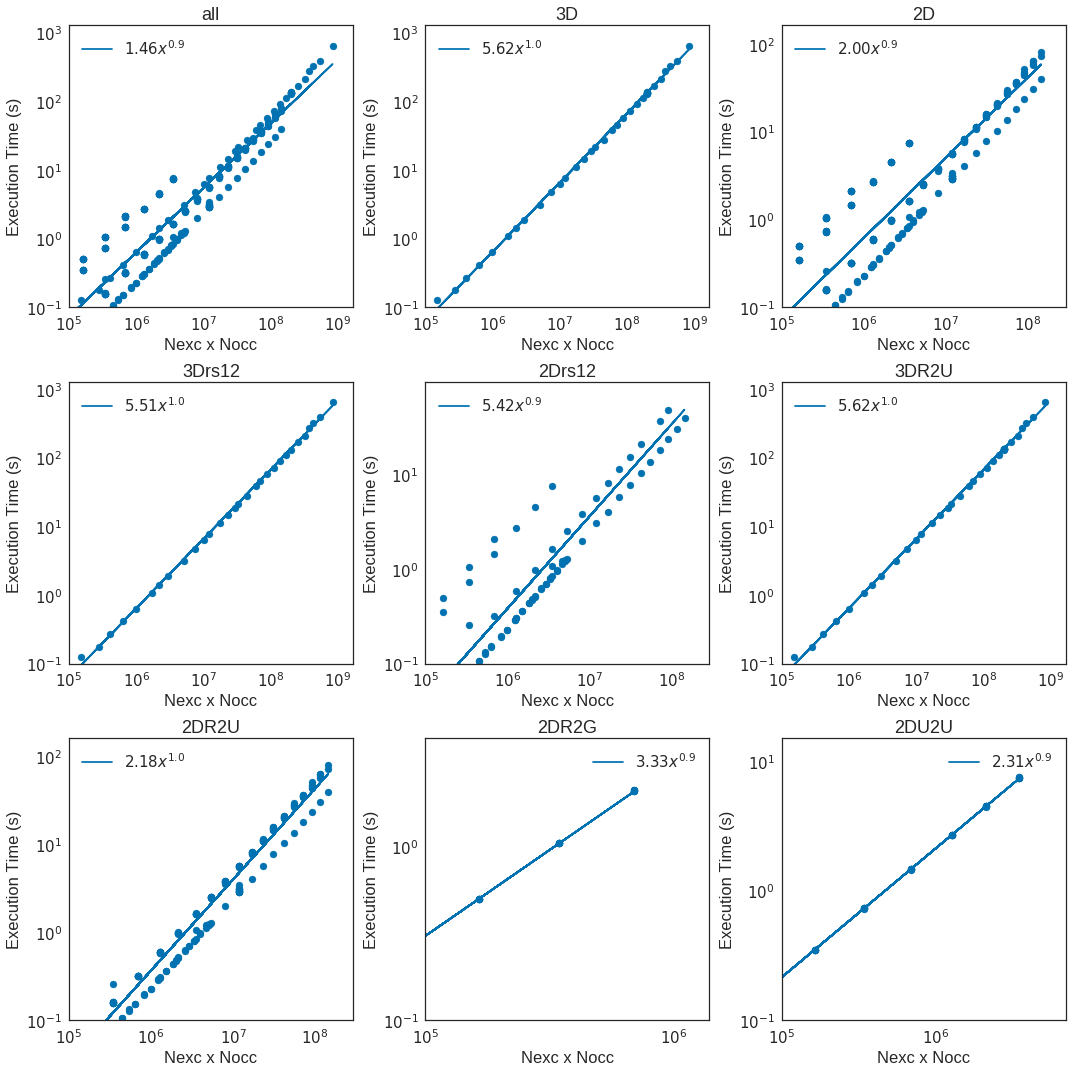

In [9]:
fig = plt.figure(figsize=(15, 15))
HFSA.subplotByDfDict(data, fig, HFSA.plot_mvproduct_scaling)
plt.tight_layout()
plt.show()

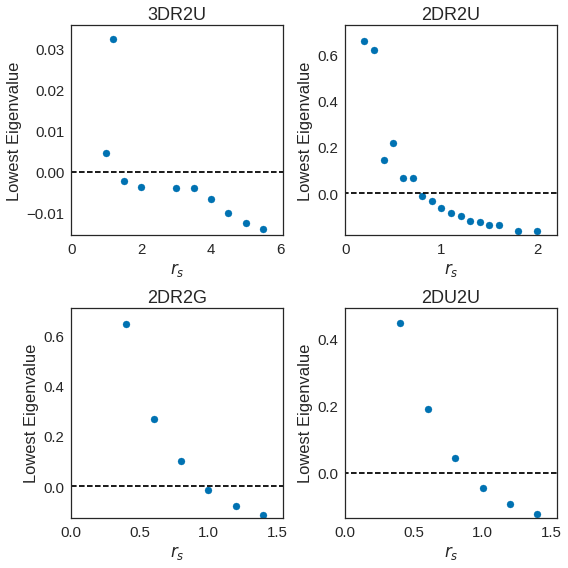

In [10]:
fig = plt.figure(figsize=(8, 8))


fdata = dict_subview(data, ['2DR2U', '2DU2U', '2DR2G', '3DR2U'])
fdata = {key : HFSA.only_max(df, 'rs', 'Nk') for key, df in fdata.items()}

HFSA.subplotByDfDict(fdata, fig, HFSA.plot_stability)
plt.tight_layout()
plt.show()

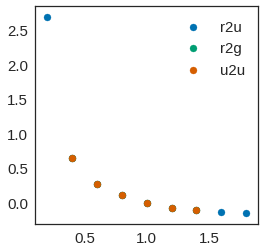

In [11]:
r2u = data['2DR2U'][data['2DR2U']['Nk'] == 33].sort_values(by='rs')
r2g = data['2DR2G'][data['2DR2G']['Nk'] == 33].sort_values(by='rs')
u2u = data['2DU2U'][data['2DU2U']['Nk'] == 33].sort_values(by='rs')

fig = plt.figure(figsize=(4, 4))
plt.scatter(r2u['rs'], r2u['Dav_final_val'], label='r2u')
plt.scatter(r2g['rs'], r2g['Dav_final_val'], label='r2g')
plt.scatter(u2u['rs'], u2u['Dav_final_val'], label='u2u')
plt.legend()
plt.show()

In [12]:
r2gdav = r2g.Dav_final_val.as_matrix()
r2udav = r2u.Dav_final_val.as_matrix()[1:-2]
u2udav = u2u.Dav_final_val.as_matrix()

print(r2gdav)
print(r2udav)
print(u2udav)

print((np.abs(r2gdav-r2udav)))
print((np.abs(r2gdav-u2udav)))
print((np.abs(u2udav-r2udav)))

[ 0.64484822  0.2689833   0.10043638 -0.01560212 -0.07771403 -0.11424282]
[ 0.64484822  0.2689833   0.10043638 -0.01560212 -0.07771403 -0.11424282]
[ 0.64484822  0.2689833   0.10043638 -0.01560212 -0.07771403 -0.11424282]
[  1.84963156e-13   8.29891711e-14   4.99600361e-15   9.99200722e-16
   0.00000000e+00   9.99200722e-16]
[  2.99760217e-15   7.29971639e-14   1.99840144e-15   9.99200722e-16
   9.99200722e-16   0.00000000e+00]
[  1.87960758e-13   9.99200722e-15   2.99760217e-15   0.00000000e+00
   9.99200722e-16   9.99200722e-16]


In [13]:

u2u[abs(u2u['rs'] - 0.4) < 1e-3]

,Computation Started,Computation Finished,Nk,ndim,rs,mycase,deltaK,kf,kmax,Nocc,...,Dav_maxsubsize,cond_number,Occ Energies,Vir Energies,Excitation Energies,Kgrid,DavVals,Occupied States,Virtual States,Excitations
000000.400_00033_2_cUHF2cUHF_eQh0pV,Thu Mar 9 12:29:40 2017,Thu Mar 9 13:05:48 2017,33,2,0.4,cUHF2cUHF,0.441942,3.535534,7.071071,193,...,1500,36.188767,"[3.4636314744, 2.86257025802, 2.51812340124, 2...","[49.2093186348, 46.1791616242, 43.3387263143, ...","[0.752232956222, 0.752232956222, 0.75223295622...","[-7.07107124203, -6.62912928941, -6.1871873367...",NaN,"[[9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[148, 134, 58, 44, 134, 148, 44, 58, 30, 30, ..."


In [14]:
# Matplotlib defaults
plt.rcParams['savefig.transparent'] = True
plt.rcParams['savefig.format'] = 'eps'

from scipy import integrate
def gaussian(x):
    y = np.exp(-x*x)
    N = 1.0 / integrate.simps(y)
    return N * y

x = np.linspace(-3, 3, 500)
fig = plt.figure()
plt.plot(x, gaussian(x))
sns.despine()
plt.gca().axes.yaxis.set_ticklabels([])
plt.gca().axes.xaxis.set_ticklabels(['','','','','0','','',''])
plt.ylabel('$f(v_x)$')
plt.xlabel('$v_x$')
plt.tight_layout()
plt.savefig('/home/evan/git/chem546Spring2017/HW2/gaussian.eps')
plt.close()

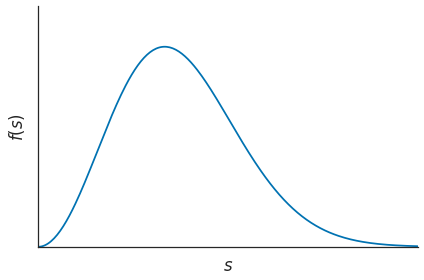

In [15]:
def poisson(x):
    y = x*x*np.exp(-x*x)
    N = 1.0 / integrate.simps(y)
    return N * y

x = np.linspace(-3, 3, 500)
fig = plt.figure()
plt.plot(x, poisson(x))
sns.despine()
plt.xlim(0,3)
plt.ylim(0, 0.006)
plt.gca().axes.yaxis.set_ticklabels([])
plt.gca().axes.xaxis.set_ticklabels([])
plt.ylabel('$f(s)$')
plt.xlabel('$s$')
plt.tight_layout()
plt.savefig('/home/evan/git/chem546Spring2017/HW2/poisson.eps')
plt.show()
plt.close()

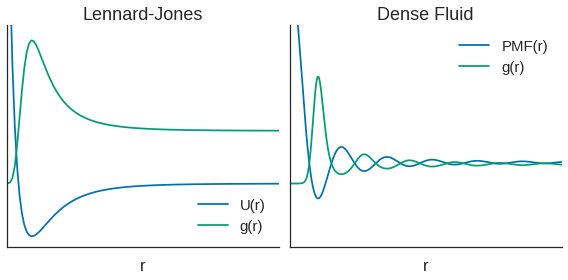

In [16]:
def lj(r, epsilon=1, rm=1):
    return epsilon * ((rm/r)**12 - 2.0*(rm/r)**6)

def g(u):
    return np.exp(-u)

def densefluid(r, density=1):
    return -4*density*np.cos(4*r)/(r*r) + density
    

x = np.linspace(0.5, 10, 500)
fig, axes = plt.subplots(1, 2, figsize=(8,4))
sns.despine()
axes[0].plot(x, lj(x), label='U(r)')
axes[0].plot(x, g(lj(x)), label='g(r)')
axes[0].set_ylim(-1.2, 3)
axes[0].set_xlim(0.8, 3)
axes[0].set_xlabel('r')
axes[0].set_yticklabels([])
axes[0].set_xticklabels([])
axes[0].legend()
axes[0].set_title('Lennard-Jones')

axes[1].plot(x, densefluid(x, density=0.4), label='PMF(r)')
axes[1].plot(x, g(densefluid(x)), label='g(r)')
axes[1].set_ylim(-1.2, 3)
axes[1].set_xlim(0.5, 10)
axes[1].set_xlabel('r')
axes[1].set_yticklabels([])
axes[1].set_xticklabels([])
axes[1].legend()
axes[1].set_title('Dense Fluid')

plt.tight_layout()
plt.savefig('/home/evan/git/chem546Spring2017/HW2/pmf.eps')
plt.show()
plt.close()